In [1]:
import pandas as pd
import numpy as np
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import collections

In [2]:
plt.rcParams.update({'font.size': 18})
xMax = 500

In [3]:
# Create independent pandas dataframe sets for each botmaster type
botmasterV1 = {}
botmasterV2 = {}
botmasterV3 = {}
path = "results/simulation"

salityData = pd.read_csv("results/sality/V3packDistribution.csv")

for f in listdir(path):
    filePath = join(path, f)

    if not isfile(filePath):
        continue
        
    m = re.search(r"BV(\d+)-(\d+).csv", f)
    if m:
        botmasterId = int(m.group(1))
        distributionPercentage = int(m.group(2))

        if botmasterId == 1:
            botmasterV1[distributionPercentage] = pd.read_csv(filePath)
        elif botmasterId == 2:
            botmasterV2[distributionPercentage] = pd.read_csv(filePath)
        elif botmasterId == 3:
            botmasterV3[distributionPercentage] = pd.read_csv(filePath)
 
botmasterV1 = collections.OrderedDict(sorted(botmasterV1.items(), key=lambda kv: kv[0]))
botmasterV2 = collections.OrderedDict(sorted(botmasterV2.items(), key=lambda kv: kv[0]))
botmasterV3 = collections.OrderedDict(sorted(botmasterV3.items(), key=lambda kv: kv[0]))

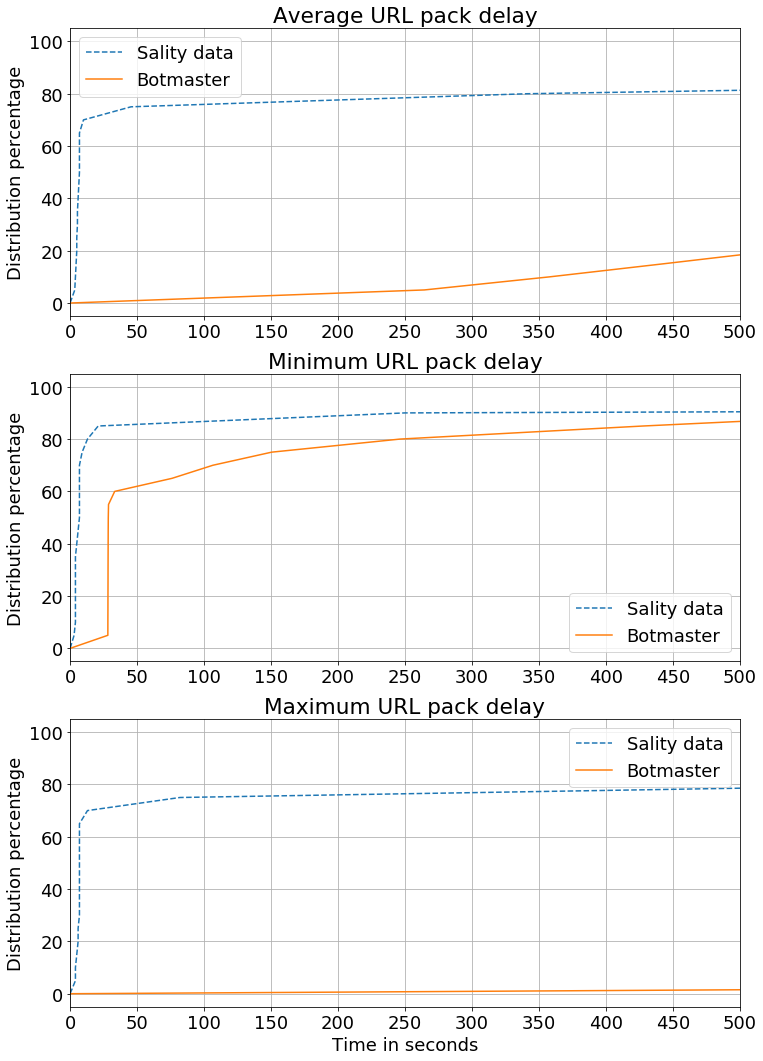

In [8]:
# Botmaster V1
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
ax1.set(ylabel='Distribution percentage', title='Average URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax2.set(ylabel='Distribution percentage', title='Minimum URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax3.set(ylabel='Distribution percentage', xlabel='Time in seconds', title='Maximum URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax1.grid()
ax2.grid()
ax3.grid()

y = np.arange(0, 101, 5)

ax1.plot(salityData['Propagation Time'], y, '--', label='Sality data')
ax2.plot(salityData['Min Delay'], y, '--', label='Sality data')
ax3.plot(salityData['Max Delay'], y, '--', label='Sality data')

for distributionPercentage, dataframe in botmasterV1.items():
    ax1.plot(dataframe['Propagation Time'], y, label='Botmaster')
    ax2.plot(dataframe['Min Delay'], y, label='Botmaster')
    ax3.plot(dataframe['Max Delay'], y, label='Botmaster')
    
ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_xlim([0, xMax])
ax2.set_xlim([0, xMax])
ax3.set_xlim([0, xMax])

fig.savefig('figures/BV1.png', dpi=fig.dpi)

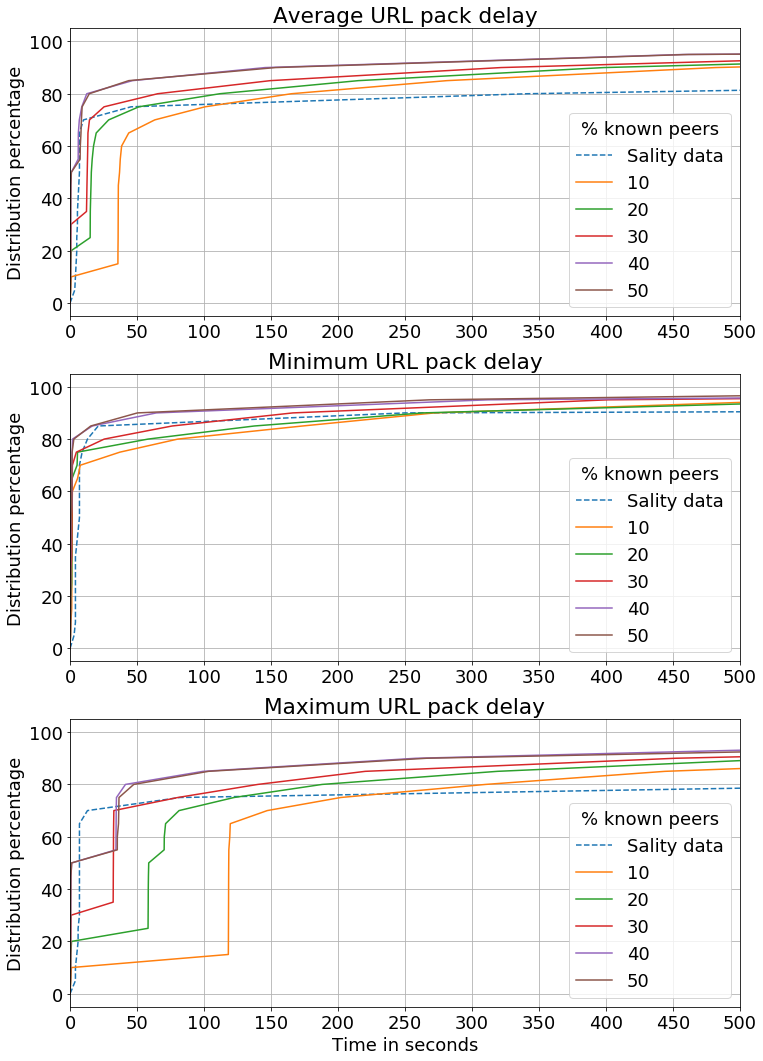

In [9]:
# Botmaster V2
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
ax1.set(ylabel='Distribution percentage', title='Average URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax2.set(ylabel='Distribution percentage', title='Minimum URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax3.set(ylabel='Distribution percentage', xlabel='Time in seconds', title='Maximum URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax1.grid()
ax2.grid()
ax3.grid()

y = np.arange(0, 101, 5)

ax1.plot(salityData['Propagation Time'], y, '--', label='Sality data')
ax2.plot(salityData['Min Delay'], y, '--', label='Sality data')
ax3.plot(salityData['Max Delay'], y, '--', label='Sality data')

for distributionPercentage, dataframe in botmasterV2.items():
    ax1.plot(dataframe['Propagation Time'], y, label=distributionPercentage)
    ax2.plot(dataframe['Min Delay'], y, label=distributionPercentage)
    ax3.plot(dataframe['Max Delay'], y, label=distributionPercentage)
            
ax1.legend(title='% known peers')
ax2.legend(title='% known peers')
ax3.legend(title='% known peers')

ax1.set_xlim([0, xMax])
ax2.set_xlim([0, xMax])
ax3.set_xlim([0, xMax])

fig.savefig('figures/BV2.png', dpi=fig.dpi)

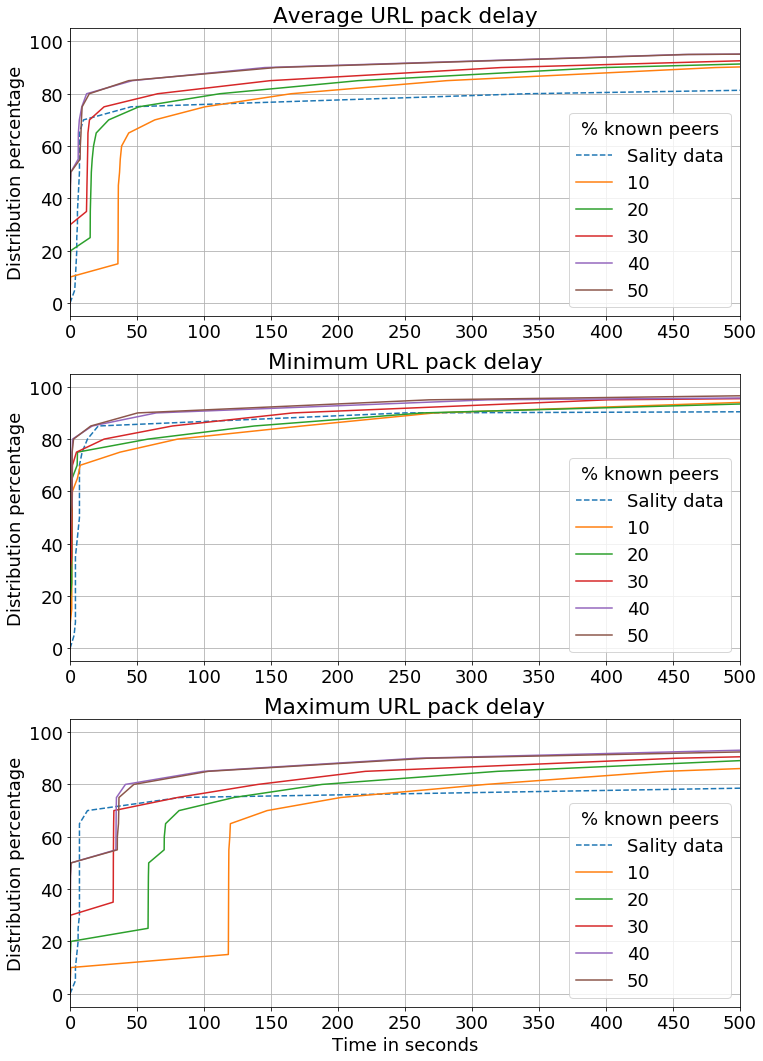

In [10]:
# Botmaster V3
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
ax1.set(ylabel='Distribution percentage', title='Average URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax2.set(ylabel='Distribution percentage', title='Minimum URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax3.set(ylabel='Distribution percentage', xlabel='Time in seconds', title='Maximum URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
ax1.grid()
ax2.grid()
ax3.grid()

y = np.arange(0, 101, 5)

ax1.plot(salityData['Propagation Time'], y, '--', label='Sality data')
ax2.plot(salityData['Min Delay'], y, '--', label='Sality data')
ax3.plot(salityData['Max Delay'], y, '--', label='Sality data')

for distributionPercentage, dataframe in botmasterV3.items():
    ax1.plot(dataframe['Propagation Time'], y, label=distributionPercentage)
    ax2.plot(dataframe['Min Delay'], y, label=distributionPercentage)
    ax3.plot(dataframe['Max Delay'], y, label=distributionPercentage)
            
ax1.legend(title='% known peers')
ax2.legend(title='% known peers')
ax3.legend(title='% known peers')

ax1.set_xlim([0, xMax])
ax2.set_xlim([0, xMax])
ax3.set_xlim([0, xMax])

fig.savefig('figures/BV3.png', dpi=fig.dpi)